##### Get all the csvs in the directory and get the last one (most recent) and calculat the max and mean results

In [4]:
# Get the list of csv's
import glob
files = glob.glob("/home/arthur/CLionProjects/GeneticAlgorithm/results/*.csv")

# Get the values for the latest run
maxes = []
means = []

config = []

import csv
with open(files[-1], newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for idx, row in enumerate(spamreader):
        if idx == 0:
            config = row[0].split(',')
            continue
        row = row[0].split(',')    
        maxes.append(row[0])
        means.append(row[1])

##### Plot the results

Parameters of GA:
Number of generations: 300
Number of chromosones: 130
Size of population: 300
Probability of crossover: 100
Probability of mutation: 10830


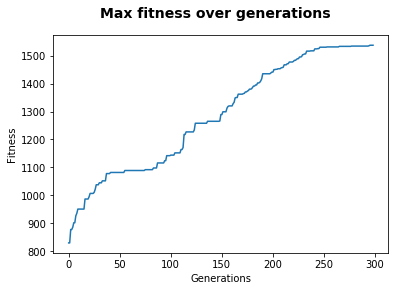

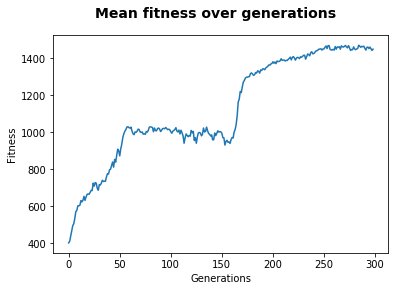

In [5]:
print('Parameters of GA:')
print('Number of generations: %s' % config[0])
print('Number of chromosones: %s' % config[1])
print('Size of population: %s' % config[2])
print('Probability of crossover: %s' % config[3])
print('Probability of mutation: %s' % config[4])

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.suptitle('Max fitness over generations', fontsize=14, fontweight='bold')
plt.plot(range(0, len(maxes)), maxes)
plt.ylabel('Fitness')
plt.xlabel('Generations')
plt.show()

fig = plt.figure()
fig.suptitle('Mean fitness over generations', fontsize=14, fontweight='bold')
plt.plot(range(0, len(means)), means)
plt.ylabel('Fitness')
plt.xlabel('Generations')
plt.show()